In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

from sklearn import model_selection
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import max_error
import seaborn as sns

pd.set_option('display.max_columns', None)
from sklearn.ensemble import GradientBoostingRegressor
import datetime

# MEMBACA DATA CSV

In [2]:
csv = pd.read_csv("datafinal_dengan_mmr_fix.csv")
csv = csv.drop(columns=['account_id'])
csv

,mmr,kills,deaths,assists,kda,gold_per_min,xp_per_min,last_hits,denies,lane_efficiency_pct,duration,level,hero_damage,tower_damage,hero_healing,stuns,tower_kills,neutral_kills,courier_kills,purchase_tpscroll,purchase_ward_observer,purchase_ward_sentry,purchase_gem,purchase_rapier,pings,throw,comeback,stomp,loss,actions_per_min,wins,losses,games_played,rating
0,6090.0,5.022472,8.280899,13.213483,2.078652,407.404494,560.595506,115.932584,5.640449,51.643678,1895.853933,19.235955,16888.764045,1218.179775,1522.370787,27.881336,0.655172,29.793103,0.310345,6.070588,8.567568,10.266667,1.000000,0.0,19.076923,4827.400000,3585.000000,7245.261905,6474.888889,242.517241,43,44,87,1029.720
1,5773.0,6.578059,8.375527,12.575949,2.073840,388.858650,500.607595,150.689873,5.962025,53.630435,2470.329114,20.394515,19825.404762,1499.807143,1193.854762,29.543527,0.891304,45.771739,0.228261,6.670330,3.076923,1.944444,0.000000,0.0,17.215909,4522.877551,3501.627907,7525.651163,8254.693878,126.956522,43,44,87,1029.720
2,6090.0,7.516854,6.146067,8.988764,2.348315,498.471910,663.752809,210.561798,9.629213,68.942529,1895.853933,21.157303,24094.235955,3219.123596,1013.516854,19.898411,1.494253,81.666667,0.149425,4.266667,2.450000,3.090909,0.000000,0.0,7.208955,4827.400000,3585.000000,7245.261905,6474.888889,176.689655,43,44,87,1029.720
3,4896.0,6.448276,7.051724,11.896552,2.137931,463.672414,652.206897,179.913793,8.051724,64.315789,2000.482759,21.500000,22975.000000,2390.879310,1620.413793,21.226915,1.105263,65.157895,0.210526,5.245614,4.024390,6.454545,0.000000,0.0,14.020833,5419.580645,3403.500000,7516.923077,6467.290323,181.631579,43,44,58,1029.720
4,5008.0,6.163121,8.021277,14.120567,2.439716,397.687943,535.780142,140.645390,4.361702,64.076923,2376.936170,20.985816,21808.923077,1735.692308,434.692308,27.914794,1.038462,58.576923,0.134615,5.120000,4.000000,4.235294,0.000000,0.0,10.116279,5857.555556,3516.480000,7378.560000,6137.925926,113.076923,43,44,52,1029.720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5588,3158.0,24.000000,7.000000,11.500000,5.500000,700.000000,915.000000,353.000000,10.500000,59.000000,2626.500000,25.000000,51697.000000,9006.500000,0.000000,65.847655,4.000000,153.500000,0.000000,7.500000,0.000000,0.000000,0.000000,0.0,38.000000,7278.000000,6688.000000,15072.000000,5632.000000,345.500000,0,2,1,968.002
5589,2212.0,5.510436,7.636622,16.168880,2.884250,351.722960,479.740038,102.500000,6.122391,36.055556,2530.038899,20.135674,17212.139180,943.974261,745.433746,56.145199,0.444444,20.500000,0.037037,9.245283,8.173913,10.511111,2.000000,0.0,27.820000,2326.541667,2333.366667,25474.000000,19117.250000,249.037037,0,2,1,968.002
5590,4112.0,10.779323,6.829504,12.914752,3.591294,527.951632,608.261185,243.522370,11.973398,64.142857,2497.795042,22.145103,27396.173015,3701.123305,633.987088,38.404655,1.785714,75.959184,0.132653,7.717949,4.205882,5.242424,1.000000,1.5,18.338542,2211.294737,2435.564356,21389.277228,20322.431579,175.586735,0,2,1,968.002
5591,4306.0,4.756085,7.337678,13.809682,2.540630,321.698763,400.203219,73.435829,3.704349,37.760048,2486.289533,17.463093,10026.761277,689.613706,667.345309,44.679194,0.585542,24.605622,0.032932,8.280193,9.349132,8.962168,1.175711,1.0,38.062931,2523.431694,2685.722384,22346.243459,22955.934426,126.040883,13,7,20,1033.030


# DROP VARIABLE UNRELATED

In [3]:
X = csv.drop(columns=['rating','throw','comeback','stomp','loss']).values
y = csv['rating'].values
print(X.shape)

(5593, 29)


# TAHAP DATA TRANSFORMATION

In [4]:
sc_X = StandardScaler()
# sc_X = MinMaxScaler(feature_range=(0, 1))
X = sc_X.fit_transform(X)
print(X)

[[ 1.41608439 -1.17170368  0.85459398 ...  0.05147541  0.13420353
   1.54434118]
 [ 1.17550319 -0.52794216  0.91501234 ...  0.05147541  0.13420353
   1.54434118]
 [ 1.41608439 -0.1394329  -0.50845148 ...  0.05147541  0.13420353
   1.54434118]
 ...
 [-0.08508158  1.21070164 -0.07209129 ... -0.24575831 -0.253995
  -0.21141013]
 [ 0.06215108 -1.28194496  0.25236701 ... -0.15589695 -0.20778089
   0.17648842]
 [-0.5715565   1.20370565  0.47120766 ... -0.24575831 -0.26323782
  -0.21141013]]


# GRIDSEARCH UNTUK MENCARI PARAMETER TERBAIK

In [6]:
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(
        estimator=GradientBoostingRegressor(),
        param_grid={
            'subsample': [0.1,0.3,0.5],
            'learning_rate': [0.01,0.05,0.1],
            'n_estimators': [100,300,500]
        },
        cv=10, scoring='neg_root_mean_squared_error')

In [5]:
# grid_result = gsc.fit(X, y)
# best_params = grid_result.best_params_
regressor = GradientBoostingRegressor(
    subsample=0.5, 
    learning_rate=0.05, 
    n_estimators=500,
    )

In [8]:
best_params

{'learning_rate': 0.05, 'n_estimators': 500, 'subsample': 0.5}

# PEMBAGIAN DATA TESTING & TRAINING

In [21]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1)

# PELATIHAN DATA

In [22]:
regressor.fit(train_X, train_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# HASIL PELATIHAN DATA

In [23]:
a = datetime.datetime.now()
regressor.fit(train_X, train_y)
b = datetime.datetime.now()
c = b - a
print("time = ", c)

pred_train_rf= regressor.predict(train_X)
print("RMSE Training = ",np.sqrt(mean_squared_error(train_y,pred_train_rf)))
print("R2 Score Training = ",r2_score(train_y, pred_train_rf))

print('=============================')
y_pred = regressor.predict(test_X)
print("RMSE Test = ",np.sqrt(mean_squared_error(test_y,y_pred)))
print("R2 Score Test = ",r2_score(test_y, y_pred))

0:00:09.876785
10.10327372635735
0.9834507781165186
14.801002710031712
0.9623979343910547


# BAR PERBANDINGAN HASIL PREDIKSI ELO RATING VS ACTUAL ELO RATING

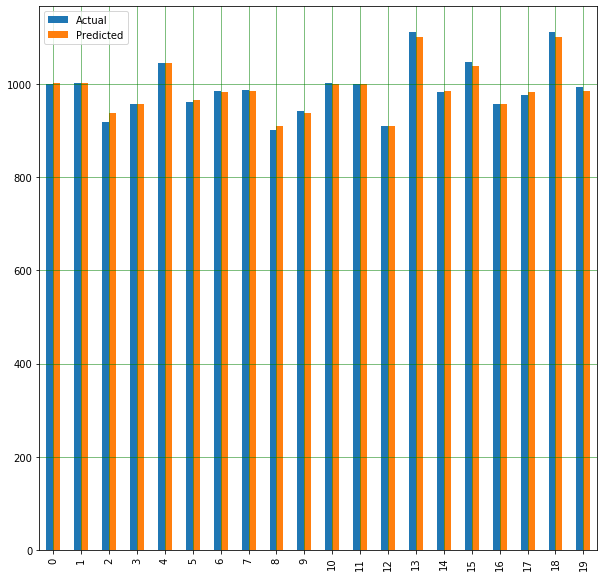

In [24]:
df6 = pd.DataFrame({'Actual': test_y[:20].flatten(), 'Predicted': y_pred[:20].flatten()})
df6.plot(kind='bar', figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [39]:
scores = []
rmsee = []
# print(X)
best_svr = regressor3

cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))
    
    y_pred = best_svr.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    rmsee.append(rmse)

Train Index:  [   0    1    2 ... 5590 5591 5592] 

Test Index:  [   8   15   23   29   33   65   79   80   84  102  107  121  132  135
  151  157  167  168  177  199  208  227  230  239  240  245  248  251
  279  290  292  293  296  297  315  319  324  333  346  351  367  371
  373  381  393  401  410  418  422  425  426  439  447  453  465  468
  471  491  501  530  534  538  544  553  555  577  584  589  598  599
  605  611  624  625  626  681  691  696  705  711  712  724  730  734
  748  751  764  776  787  794  807  809  811  812  848  856  877  881
  893  903  907  911  915  925  926  932  944  952  964  969  977  994
 1002 1020 1022 1025 1032 1033 1044 1047 1057 1071 1074 1084 1086 1094
 1103 1117 1121 1144 1158 1163 1173 1175 1188 1193 1194 1197 1212 1219
 1220 1231 1235 1244 1253 1272 1305 1315 1319 1321 1323 1330 1334 1344
 1345 1351 1374 1379 1393 1400 1406 1420 1421 1425 1433 1437 1448 1467
 1468 1471 1485 1505 1512 1543 1545 1553 1558 1561 1566 1578 1606 1615
 1620 1632 1

In [43]:
print(np.mean(rmsee))

15.397186417356451


In [21]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(regressor, 'sgb_v2.pkl') 
  
# Load the model from the file 
# knn_from_joblib = joblib.load('filename.pkl')  
  
# # Use the loaded model to make predictions 
# knn_from_joblib.predict(X_test) 

D:\Code\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['sgb_v2.pkl']